In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

car = pd.read_csv('/Users/stacygiauque/Desktop/Columbia_Data_Analytics_Bootcamp/Final Project/data.csv')
car.head()

,year,hp,cylinders,doors,mpg_highway,mpg_city,popularity,msrp,make,model,fuel_type,transmission,drive,market_category,size,style
0,2004,140,4,2,33,23,1385,10135,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
1,2003,108,4,2,38,30,2031,10245,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
2,2001,79,4,2,38,31,481,10299,Suzuki,Swift,regular unleaded,MANUAL,front wheel drive,Hatchback,Compact,2dr Hatchback
3,2005,140,4,2,33,23,1385,10325,Chevrolet,Cavalier,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe
4,2004,108,4,2,38,30,2031,10355,Toyota,ECHO,regular unleaded,MANUAL,front wheel drive,Compact,Compact,Coupe


In [3]:
# Assign the data to X and y
X = car[["year","popularity"]]
y = car["msrp"].values.reshape(-1, 1)
print(X.shape, y.shape)

(10168, 2) (10168, 1)


In [4]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

X_train.head()


,year,popularity
4191,2008,210
2228,2003,1385
1115,2001,204
5215,2015,640
9591,2017,238


In [5]:
# Scale Data

### BEGIN SOLUTION

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

### END SOLUTION


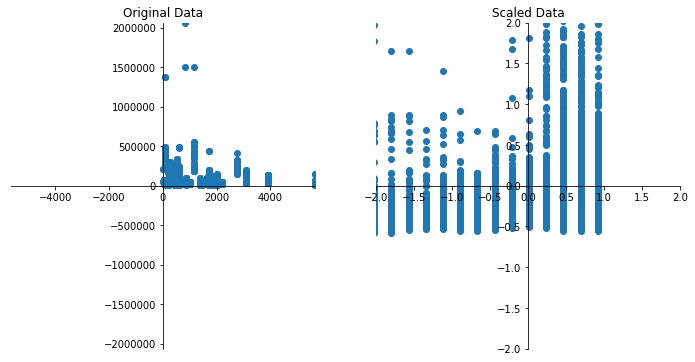

In [6]:
###  StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. 
###  We can see the difference in the following plots.
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["popularity"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["popularity"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])



In [7]:
### Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


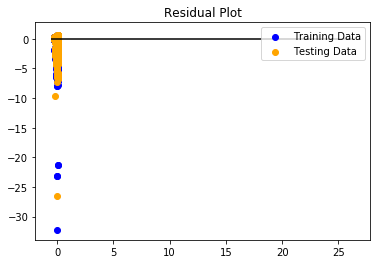

In [8]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### END SOLUTION



In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

### END SOLUTION 

MSE: 1.0108146662304986, R2: 0.005580493611773263
